IMPORTING THE CIFAR-10 DATASET

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


DISPLAYING SOME TRAINING DATA FOR FUN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# FUNCTION TO SHOW AN IMAGE
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


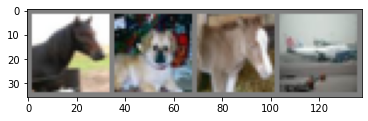

horse   dog horse plane


In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

DEFINING A CONVOLUTIONAL NEURAL NETWORK (MODEL 1)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net_M1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net_M1()

DEFINE A LOSS FUNCTION

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TRAIN THE NEURAL NETWORK

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217
[1,  4000] loss: 1.916
[1,  6000] loss: 1.691
[1,  8000] loss: 1.591
[1, 10000] loss: 1.526
[1, 12000] loss: 1.500
[2,  2000] loss: 1.429
[2,  4000] loss: 1.393
[2,  6000] loss: 1.357
[2,  8000] loss: 1.328
[2, 10000] loss: 1.331
[2, 12000] loss: 1.307
Finished Training


SAVING THE MODEL

In [ ]:
PATH1 = './cifar_net_model_1.pth'
torch.save(net.state_dict(), PATH1)

DEFINING A CONVOLUTIONAL NEURAL NETWORK (MODEL 2)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net_M2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net_M2()

**DEFINE A LOSS FUNCTION**

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**TRAINING MODEL 2**

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.243
[1,  4000] loss: 1.860
[1,  6000] loss: 1.678
[1,  8000] loss: 1.586
[1, 10000] loss: 1.526
[1, 12000] loss: 1.444
[2,  2000] loss: 1.382
[2,  4000] loss: 1.355
[2,  6000] loss: 1.319
[2,  8000] loss: 1.297
[2, 10000] loss: 1.313
[2, 12000] loss: 1.306
[3,  2000] loss: 1.179
[3,  4000] loss: 1.221
[3,  6000] loss: 1.206
[3,  8000] loss: 1.215
[3, 10000] loss: 1.168
[3, 12000] loss: 1.173
[4,  2000] loss: 1.090
[4,  4000] loss: 1.088
[4,  6000] loss: 1.107
[4,  8000] loss: 1.119
[4, 10000] loss: 1.112
[4, 12000] loss: 1.092
[5,  2000] loss: 1.028
[5,  4000] loss: 1.031
[5,  6000] loss: 1.026
[5,  8000] loss: 1.037
[5, 10000] loss: 1.037
[5, 12000] loss: 1.058
[6,  2000] loss: 0.928
[6,  4000] loss: 0.966
[6,  6000] loss: 0.976
[6,  8000] loss: 1.006
[6, 10000] loss: 0.991
[6, 12000] loss: 1.000
[7,  2000] loss: 0.885
[7,  4000] loss: 0.935
[7,  6000] loss: 0.943
[7,  8000] loss: 0.931
[7, 10000] loss: 0.938
[7, 12000] loss: 0.942
[8,  2000] loss: 0.860
[8,  4000] 

In [ ]:
PATH2 = './cifar_net_model_2.pth'
torch.save(net.state_dict(), PATH2)

DEFINING A CONVOLUTIONAL NEURAL NETWORK (MODEL 3)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net_M3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 30, 5)
        self.fc1 = nn.Linear(30 * 5 * 5, 220)
        self.fc2 = nn.Linear(220, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 25)
        self.fc5 = nn.Linear(25, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net_M3()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.206
[1,  8000] loss: 1.925
[1, 10000] loss: 1.755
[1, 12000] loss: 1.668
[2,  2000] loss: 1.536
[2,  4000] loss: 1.474
[2,  6000] loss: 1.436
[2,  8000] loss: 1.393
[2, 10000] loss: 1.342
[2, 12000] loss: 1.320
[3,  2000] loss: 1.240
[3,  4000] loss: 1.239
[3,  6000] loss: 1.225
[3,  8000] loss: 1.208
[3, 10000] loss: 1.166
[3, 12000] loss: 1.181
[4,  2000] loss: 1.072
[4,  4000] loss: 1.067
[4,  6000] loss: 1.074
[4,  8000] loss: 1.087
[4, 10000] loss: 1.057
[4, 12000] loss: 1.042
[5,  2000] loss: 0.957
[5,  4000] loss: 0.943
[5,  6000] loss: 0.958
[5,  8000] loss: 0.964
[5, 10000] loss: 0.953
[5, 12000] loss: 0.952
Finished Training


In [ ]:
PATH3 = './cifar_net_model_3.pth'
torch.save(net.state_dict(), PATH3)

DEFINING A CONVOLUTIONAL NEURAL NETWORK (MODEL 4)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net_M4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 30, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(30, 20, 5)
        self.fc1 = nn.Linear(20 * 5 * 5, 220)
        self.fc2 = nn.Linear(220, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 25)
        self.fc5 = nn.Linear(25, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net_M4()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.241
[1,  6000] loss: 1.954
[1,  8000] loss: 1.800
[1, 10000] loss: 1.707
[1, 12000] loss: 1.615
[2,  2000] loss: 1.499
[2,  4000] loss: 1.463
[2,  6000] loss: 1.397
[2,  8000] loss: 1.345
[2, 10000] loss: 1.335
[2, 12000] loss: 1.270
[3,  2000] loss: 1.214
[3,  4000] loss: 1.182
[3,  6000] loss: 1.183
[3,  8000] loss: 1.134
[3, 10000] loss: 1.101
[3, 12000] loss: 1.092
[4,  2000] loss: 1.023
[4,  4000] loss: 1.017
[4,  6000] loss: 1.010
[4,  8000] loss: 1.005
[4, 10000] loss: 0.965
[4, 12000] loss: 0.949
[5,  2000] loss: 0.887
[5,  4000] loss: 0.897
[5,  6000] loss: 0.887
[5,  8000] loss: 0.888
[5, 10000] loss: 0.869
[5, 12000] loss: 0.885
Finished Training


In [ ]:
PATH4 = './cifar_net_model_4.pth'
torch.save(net.state_dict(), PATH4)

TEST THE NETWORK ON TEST DATA

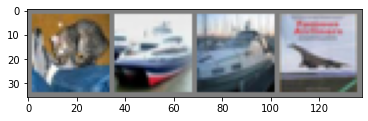

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

LOADING BACK THE SAVED MODEL 1

In [ ]:
net1 = Net_M1()
net1.load_state_dict(torch.load(PATH1))

<All keys matched successfully>

LOADING BACK THE SAVED MODEL 2

In [ ]:
net2 = Net_M2()
net2.load_state_dict(torch.load(PATH2))

<All keys matched successfully>

LOADING BACK THE SAVED MODEL 3

In [ ]:
net3 = Net_M3()
net3.load_state_dict(torch.load(PATH3))

<All keys matched successfully>

LOADING BACK THE SAVED MODEL 4

In [ ]:
net4 = Net_M4()
net4.load_state_dict(torch.load(PATH4))

<All keys matched successfully>

**MAKING PREDICTIONS AND CALCULATING ACCURACIES**

**MODEL 1**

In [ ]:
outputs = net1(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Finding Accuracy

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
all_accuracies = []
all_classes = []
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    all_accuracies.append(accuracy)
    all_classes.append(classname)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 62.3 %
Accuracy for class car   is: 66.2 %
Accuracy for class bird  is: 52.5 %
Accuracy for class cat   is: 28.2 %
Accuracy for class deer  is: 45.6 %
Accuracy for class dog   is: 55.9 %
Accuracy for class frog  is: 64.0 %
Accuracy for class horse is: 58.7 %
Accuracy for class ship  is: 68.1 %
Accuracy for class truck is: 47.7 %


CREATING A BAR GRAPH TO COMPARE THE ACCURACIES OF THE VARIOUS CLASSES

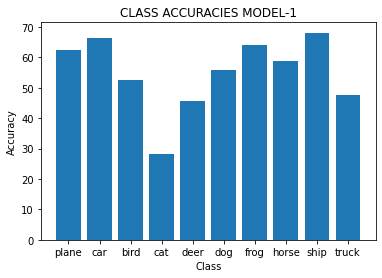

In [ ]:
import matplotlib.pyplot as plt

plt.bar(all_classes,all_accuracies)
plt.title('CLASS ACCURACIES MODEL-1')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()

**MODEL** **2**

In [ ]:
outputs = net2(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird horse  deer horse


***FINDING ACCURACY***

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

all_accuracies = []
all_classes = []
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    all_accuracies.append(accuracy)
    all_classes.append(classname)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 63.5 %
Accuracy for class car   is: 65.9 %
Accuracy for class bird  is: 52.5 %
Accuracy for class cat   is: 24.9 %
Accuracy for class deer  is: 64.0 %
Accuracy for class dog   is: 60.3 %
Accuracy for class frog  is: 54.4 %
Accuracy for class horse is: 70.4 %
Accuracy for class ship  is: 73.6 %
Accuracy for class truck is: 72.3 %


CREATING A BAR GRAPH TO COMPARE THE ACCURACIES OF THE VARIOUS CLASSES

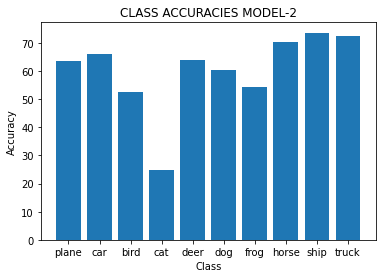

In [ ]:
import matplotlib.pyplot as plt

plt.bar(all_classes,all_accuracies)
plt.title('CLASS ACCURACIES MODEL-2')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()

***MODEL 3***

In [ ]:
outputs = net3(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   dog   car horse


***FINDING ACCURACY***

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net3(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

all_accuracies = []
all_classes = []
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    all_accuracies.append(accuracy)
    all_classes.append(classname)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 63.2 %
Accuracy for class car   is: 73.8 %
Accuracy for class bird  is: 64.5 %
Accuracy for class cat   is: 34.9 %
Accuracy for class deer  is: 45.7 %
Accuracy for class dog   is: 56.6 %
Accuracy for class frog  is: 79.4 %
Accuracy for class horse is: 66.4 %
Accuracy for class ship  is: 82.2 %
Accuracy for class truck is: 73.4 %


CREATING A BAR GRAPH TO COMPARE THE ACCURACIES OF THE VARIOUS CLASSES

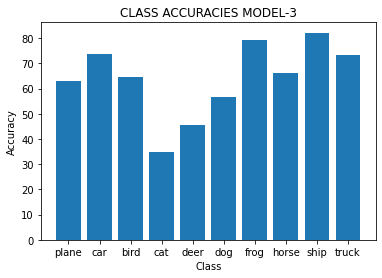

In [ ]:
import matplotlib.pyplot as plt

plt.bar(all_classes,all_accuracies)
plt.title('CLASS ACCURACIES MODEL-3')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()

***MODEL 4***

In [ ]:
outputs = net4(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   dog   car horse


**CALCULATING ACCURACY**

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net4(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net4(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

all_accuracies = []
all_classes = []
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    all_accuracies.append(accuracy)
    all_classes.append(classname)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 59.2 %
Accuracy for class car   is: 79.2 %
Accuracy for class bird  is: 61.6 %
Accuracy for class cat   is: 44.5 %
Accuracy for class deer  is: 65.0 %
Accuracy for class dog   is: 46.0 %
Accuracy for class frog  is: 86.9 %
Accuracy for class horse is: 61.5 %
Accuracy for class ship  is: 88.0 %
Accuracy for class truck is: 78.9 %


CREATING A BAR GRAPH TO COMPARE THE ACCURACIES OF THE VARIOUS CLASSES

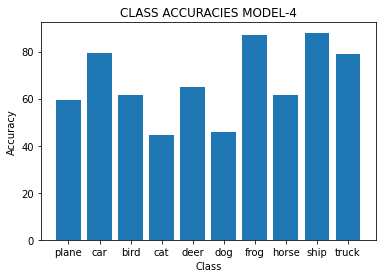

In [ ]:
import matplotlib.pyplot as plt

plt.bar(all_classes,all_accuracies)
plt.title('CLASS ACCURACIES MODEL-4')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()

COMPARING THE ACCURACIES OF THE MODELS WITH A BAR GRAPH

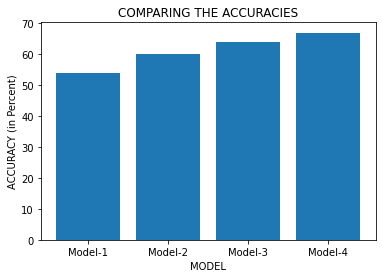

In [ ]:
import matplotlib.pyplot as plt

all_models = ['Model-1', 'Model-2', 'Model-3', 'Model-4']
all_model_accuracies=[54 , 60, 64, 67 ]
plt.bar(all_models,all_model_accuracies)
plt.title('COMPARING THE ACCURACIES')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY (in Percent)')
plt.show()

So, We can observe the accuracy has increased by 13%. It can be further increased by changing the epocs and adding layers to the CNN